Равномерное распределение:
N		Точек под кривой	Значение интеграла
10		4			8.600
20		9			8.800
40		20			9.000
80		36			8.800
160		73			8.825
320		133			8.662
640		282			8.762
1280		586			8.831
2560		1162			8.816
5120		2393			8.870
10240		4669			8.824
20480		9403			8.837
40960		18646			8.821
81920		37574			8.835
163840		75330			8.839
327680		149985			8.831
655360		300184			8.832

Биномиальное распределение:
N		Точек под кривой	Значение интеграла
10		6			9.400
20		11			9.200
40		17			8.700
80		39			8.950
160		71			8.775
320		153			8.912
640		278			8.738
1280		609			8.903
2560		1152			8.800
5120		2335			8.824
10240		4658			8.820
20480		9284			8.813
40960		18781			8.834
81920		37498			8.831
163840		75371			8.840
327680		150080			8.832
655360		300225			8.832

Среднее значение интеграла (равномерное): 8.832
Среднее значение интеграла (биномиальное): 8.832
Разница между значениями интеграла: 0.000
Приближённое значение интеграла (N=1000): 8.867


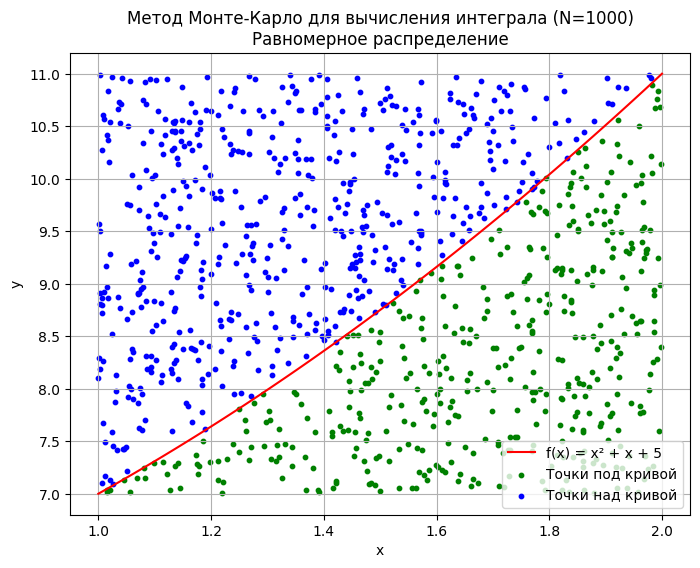

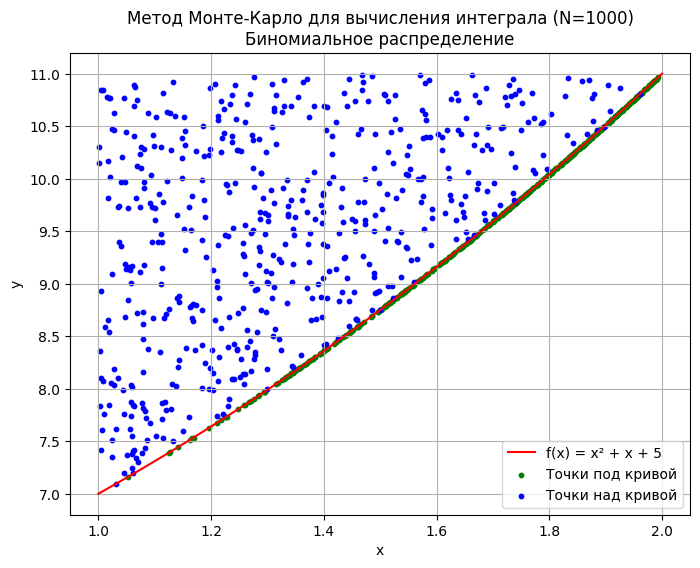

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a, b = 1, 2  # Границы интегрирования
f_min, f_max = 7, 11  # Минимальное и максимальное значение функции
N_values = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960, 81920, 163840, 327680, 655360]

# Функция
def f(x):
    return x**2 + x + 5

# Точное значение интеграла (для сравнения)
exact_integral = 53 / 6  # 8.8333...

# Функция для метода Монте-Карло с равномерным распределением
def monte_carlo_uniform(N):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(f_min, f_max, N)
    below_curve = y <= f(x)
    points_below = np.sum(below_curve)
    area = (b - a) * (points_below / N) * (f_max - f_min) + (b - a) * f_min
    return points_below, area, x, y, below_curve

# Функция для метода Монте-Карло с биномиальным распределением
def monte_carlo_binomial(N):
    x = np.random.uniform(a, b, N)
    # Вероятность попадания под график
    p = (f(x) - f_min) / (f_max - f_min)
    # Генерируем биномиальные успехи (1 — под графиком, 0 — над)
    below_curve = np.random.binomial(1, p)
    points_below = np.sum(below_curve)
    # Для корректного соответствия y-координат точкам
    y = below_curve * f(x) + (1 - below_curve) * (f(x) + np.random.uniform(0, f_max - f(x)))
    area = (b - a) * (points_below / N) * (f_max - f_min) + (b - a) * f_min
    return points_below, area, x, y, below_curve

# Симуляции
print("Равномерное распределение:")
print("N\t\tТочек под кривой\tЗначение интеграла")
uniform_results = []
for N in N_values:
    points_below, area, _, _, _ = monte_carlo_uniform(N)
    uniform_results.append((N, points_below, area))
    print(f"{N}\t\t{points_below}\t\t\t{area:.3f}")

print("\nБиномиальное распределение:")
print("N\t\tТочек под кривой\tЗначение интеграла")
binomial_results = []
for N in N_values:
    points_below, area, _, _, _ = monte_carlo_binomial(N)
    binomial_results.append((N, points_below, area))
    print(f"{N}\t\t{points_below}\t\t\t{area:.3f}")

# Среднее значение для N=655360
uniform_avg = uniform_results[-1][2]
binomial_avg = binomial_results[-1][2]
print(f"\nСреднее значение интеграла (равномерное): {uniform_avg:.3f}")
print(f"Среднее значение интеграла (биномиальное): {binomial_avg:.3f}")
print(f"Разница между значениями интеграла: {abs(uniform_avg - binomial_avg):.3f}")
print(f"Приближённое значение интеграла (N=1000): {(uniform_results[7][2] + binomial_results[7][2]) / 2:.3f}")

# График для равномерного распределения (N=1000)
N_plot = 1000
points_below, _, x_points, y_points, below_curve = monte_carlo_uniform(N_plot)
plt.figure(figsize=(8, 6))
x_curve = np.linspace(a, b, 100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')
plt.scatter(x_points[below_curve], y_points[below_curve], color='green', s=10, label='Точки под кривой')
plt.scatter(x_points[~below_curve], y_points[~below_curve], color='blue', s=10, label='Точки над кривой')
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)\nРавномерное распределение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.savefig('monte_carlo_uniform.png')

# График для биномиального распределения (N=1000)
points_below, _, x_points, y_points, below_curve = monte_carlo_binomial(N_plot)
plt.figure(figsize=(8, 6))
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')
plt.scatter(x_points[below_curve == 1], y_points[below_curve == 1], color='green', s=10, label='Точки под кривой')
plt.scatter(x_points[below_curve == 0], y_points[below_curve == 0], color='blue', s=10, label='Точки над кривой')
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)\nБиномиальное распределение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.savefig('monte_carlo_binomial.png')

In [3]:
# подключаем модуль случайных чисел
import random
 
# функция, которая посчитает число пи
def count_pi(n):
	# общее количество бросков
    i = 0
	# сколько из них попало в круг
    count = 0
    # пока мы не дошли до финального броска
    while i < n:
        # случайным образом получаем координаты x и y
        x = random.random()
        y = random.random()
        # проверяем, попали мы в круг или нет
        if (pow(x, 2) + pow(y, 2)) < 1:
			# если попали — увеличиваем счётчик на 1
            count += 1
		# в любом случае увеличиваем общий счётчик
        i += 1
    # считаем и возвращаем число пи
    print(count)
    return 4 * (count / n)
 
# запускаем функцию
pi = count_pi(1000000)
# выводим результат
print(pi)

785514
3.142056
